In [97]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Efecto fotoeléctrico.

In [98]:
def Minimos_cuadrados(x,y,n=1):
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

def GetError(x,y,p,n=1):
    
    l = x.shape[0]
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    # Residuos
    R = y - np.dot(A,p)
    
    sigma2 = np.dot(R.T,R)/(len(y)-len(p))
    
    Cov = sigma2*np.linalg.inv(np.dot(A.T,A))
    
    R2 = None
    if np.shape(Cov) == (2,2):
        R2 = (Cov[0][1]**2)/(Cov[0][0]*Cov[1][1])

    return (Cov,R2,R)

X = sym.Symbol('x',real=True)
Y = sym.Symbol('y',real=True)

# Datos.

In [99]:
intensidades = np.array([10, 9.5, 9, 8.5, 8, 7.5, 7, 6.5, 6, 5.5, 5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5])

voltajes_rojo = np.array([80, 93, 103, 113, 122, 131, 140, 149, 157, 166, 176, 185, 195, 205, 217, 228, 242, 263, 289, 321])
voltajes_amarillo = np.array([312, 320, 326, 329, 336, 344, 349, 356, 362, 370, 378, 385, 397, 406, 416, 430, 445, 463, 482, 521])
voltajes_verde = np.array([689, 692, 694, 695, 697, 699, 701, 702, 704, 705, 707, 709, 711, 713, 715, 717, 719, 721, 723, 725])
voltajes_azul = np.array([861, 862, 863, 865, 866, 868, 868, 870, 870, 871, 872, 872, 873, 874, 874, 875, 876, 877, 878, 879])
voltajes_rojo_x9 = np.array([324, 328, 337, 342, 343, 348, 351, 354, 357, 361, 364, 368, 373, 377, 382, 386, 391, 397, 402, 410])

In [100]:
error_x = 0.25

# Análisis.

Rojo

In [101]:
param = Minimos_cuadrados(intensidades,voltajes_rojo)
(param[1],param[0])

(-22.11578947368422, 294.8578947368422)

In [102]:
Cov,R2,r = GetError(intensidades,voltajes_rojo,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(0.9588912165221534, 5.743350163345402)

In [103]:
R2

0.7682926829268291

In [104]:
r

array([  6.3       ,   8.24210526,   7.18421053,   6.12631579,
         4.06842105,   2.01052632,  -0.04736842,  -2.10526316,
        -5.16315789,  -7.22105263,  -8.27894737, -10.33684211,
       -11.39473684, -12.45263158, -11.51052632, -11.56842105,
        -8.62631579,   1.31578947,  16.25789474,  37.2       ])

In [105]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [106]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

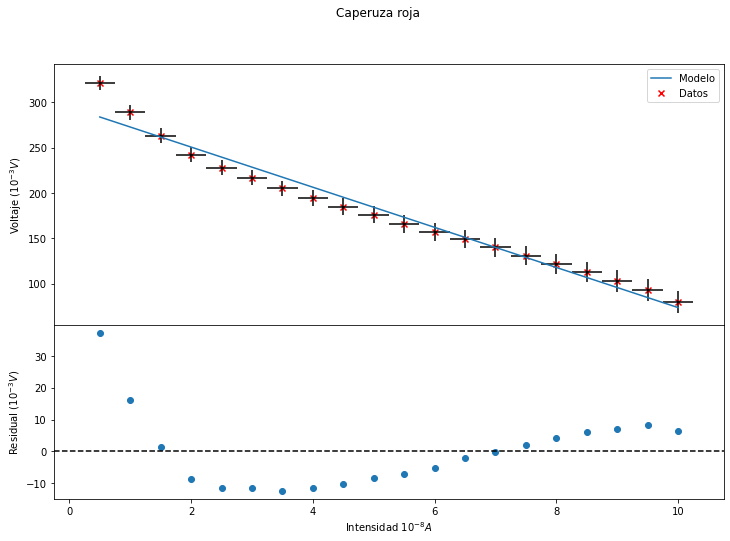

In [107]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza roja')
axs[0].scatter(intensidades,voltajes_rojo,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_rojo, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()

Amarillo

In [108]:
param = Minimos_cuadrados(intensidades,voltajes_amarillo)
(param[1],param[0])

(-19.024060150375956, 486.2263157894738)

In [109]:
Cov,R2,r = GetError(intensidades,voltajes_amarillo,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(1.177369987167531, 7.0519449877142435)

In [110]:
R2

0.7682926829268292

In [111]:
r

array([ 16.01428571,  14.50225564,  10.99022556,   4.47819549,
         1.96616541,   0.45413534,  -4.05789474,  -6.56992481,
       -10.08195489, -11.59398496, -13.10601504, -15.61804511,
       -13.13007519, -13.64210526, -13.15413534,  -8.66616541,
        -3.17819549,   5.30977444,  14.79774436,  44.28571429])

In [112]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [113]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

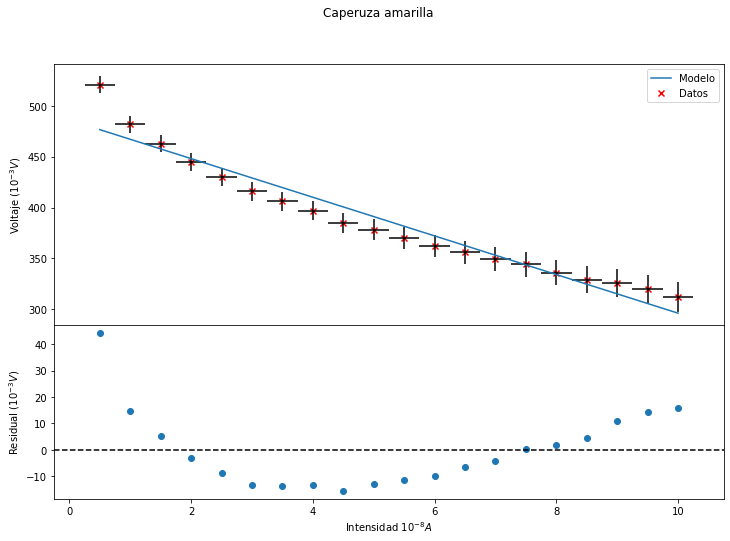

In [114]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza amarilla')
axs[0].scatter(intensidades,voltajes_amarillo,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_amarillo, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()

Verde

In [115]:
param = Minimos_cuadrados(intensidades,voltajes_verde)
(param[1],param[0])

(-3.66616541353386, 726.1473684210529)

In [116]:
Cov,R2,r = GetError(intensidades,voltajes_verde,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(0.041973777274101405, 0.2514050566004578)

In [117]:
R2

0.7682926829268292

In [118]:
r

array([-0.48571429,  0.68120301,  0.8481203 ,  0.01503759,  0.18195489,
        0.34887218,  0.51578947, -0.31729323, -0.15037594, -0.98345865,
       -0.81654135, -0.64962406, -0.48270677, -0.31578947, -0.14887218,
        0.01804511,  0.18496241,  0.3518797 ,  0.51879699,  0.68571429])

In [119]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [120]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

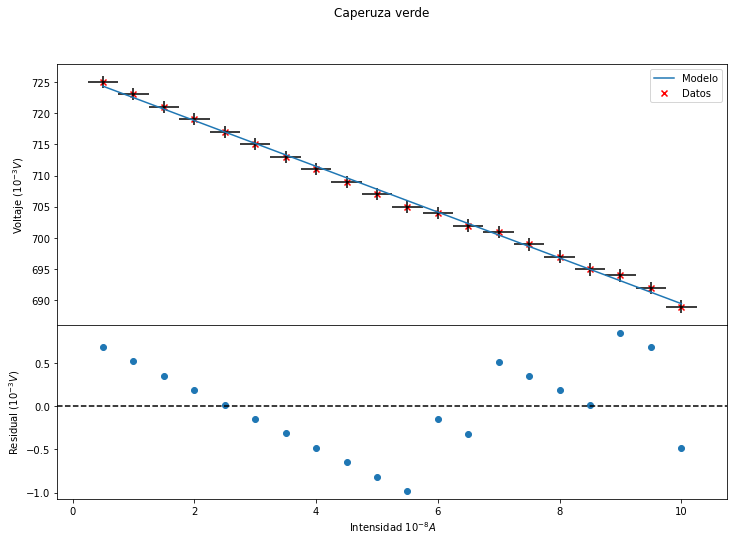

In [121]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza verde')
axs[0].scatter(intensidades,voltajes_verde,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_verde, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()

Azúl

In [122]:
param = Minimos_cuadrados(intensidades,voltajes_azul)
(param[1],param[0])

(-1.7804511278195796, 880.0473684210529)

In [123]:
Cov,R2,r = GetError(intensidades,voltajes_azul,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(0.06114055506635786, 0.3662058958064116)

In [124]:
R2

0.7682926829268291

In [125]:
r

array([-1.24285714, -1.13308271, -1.02330827,  0.08646617,  0.1962406 ,
        1.30601504,  0.41578947,  1.52556391,  0.63533835,  0.74511278,
        0.85488722, -0.03533835,  0.07443609,  0.18421053, -0.70601504,
       -0.5962406 , -0.48646617, -0.37669173, -0.26691729, -0.15714286])

In [126]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [127]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

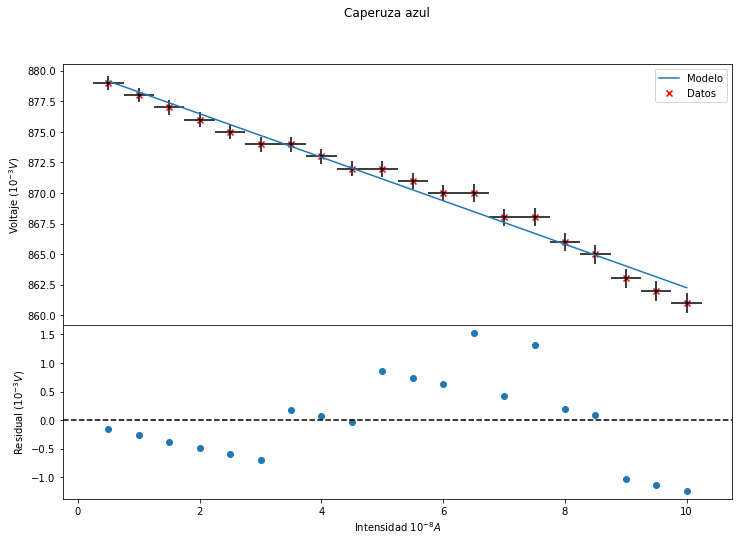

In [128]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza azul')
axs[0].scatter(intensidades,voltajes_azul,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_azul, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-8}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()

Rojo x10^-9

In [129]:
param = Minimos_cuadrados(intensidades,voltajes_rojo_x9)
(param[1],param[0])

(-8.302255639097757, 408.33684210526326)

In [130]:
Cov,R2,r = GetError(intensidades,voltajes_rojo_x9,param)
delta_m = np.sqrt(Cov[-1][-1])
delta_b = np.sqrt(Cov[0][0])
(delta_m,delta_b)

(0.19566022937354727, 1.1719214765659494)

In [131]:
R2

0.7682926829268292

In [132]:
r

array([-1.31428571, -1.46541353,  3.38345865,  4.23233083,  1.08120301,
        1.93007519,  0.77894737, -0.37218045, -1.52330827, -1.67443609,
       -2.82556391, -2.97669173, -2.12781955, -2.27894737, -1.43007519,
       -1.58120301, -0.73233083,  1.11654135,  1.96541353,  5.81428571])

In [133]:
error_y = np.sqrt((intensidades*delta_m)**2 + (param[1]*error_x)**2 + (delta_b**2))

In [134]:
_x = np.linspace(np.min(intensidades),np.max(intensidades),50)
_y = GetModel(_x,param)

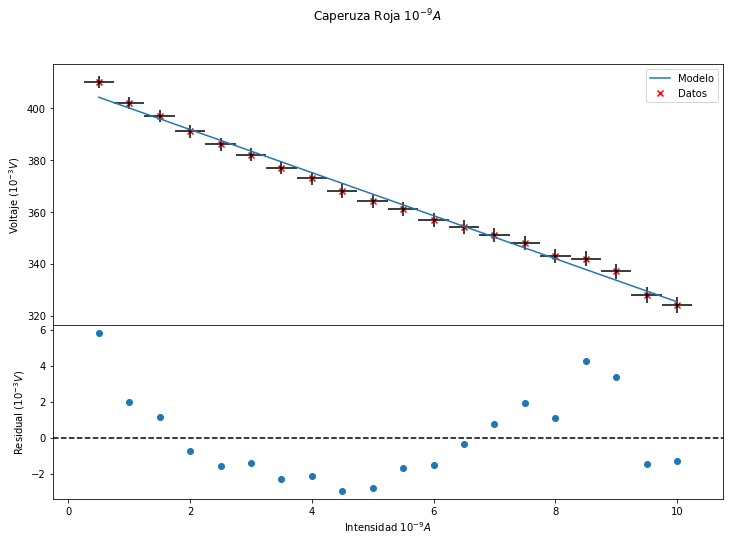

In [135]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [1.5, 1]},sharex=True)
fig.subplots_adjust(hspace=0)

fig.suptitle('Caperuza Roja $10^{-9}A$')
axs[0].scatter(intensidades,voltajes_rojo_x9,label='Datos',color='r',marker='x')
axs[0].errorbar(intensidades,voltajes_rojo_x9, xerr= error_x,yerr= error_y, fmt='none', ecolor='black')
axs[0].plot(_x,_y,label='Modelo')
axs[0].set_ylabel('Voltaje ($10^{-3}V$)')
#axs[0].text(421,430,'$y = (1.27 \pm 0.01) x + (23 \pm 6)$\n$R^{2} = 0.966$',fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'))
axs[0].legend()

axs[1].scatter(intensidades,r)
axs[1].axhline(y=0, color='black', linestyle='--')
axs[1].set_xlabel('Intensidad $10^{-9}A$')
axs[1].set_ylabel('Residual ($10^{-3}V$)')
#axs[1].set_ylim(-1.7,1.7)
#axs[1].set_yticks(np.arange(-1.5, 2., 0.5))

plt.show()